In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_digits

In [92]:
digits = load_digits()
x = digits.data
y = digits.target 

4


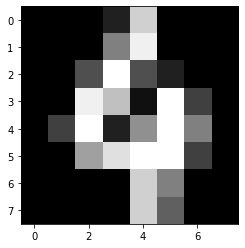

In [3]:
n=100
plt.imshow(x[n,:].reshape(8,8),cmap='gray')
print(y[n])

In [32]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, recall_score,f1_score

In [94]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

### define a function for classification

In [107]:
def classification(x,y):
    x_train, x_test, y_train, y_test = train_test_split (x,y)
    m1 = AdaBoostClassifier ()
    m2 = GradientBoostingClassifier()
    m3 = RandomForestClassifier()
    # m4 = MLPClassifier()
    m4 = MLPClassifier (hidden_layer_sizes =(10,10,5), solver = 'sgd', learning_rate = 'adaptive',max_iter = 500)
    m5 = MultinomialNB ()
    m6 = SVC ()
    models = [m1, m2, m3, m4, m5, m6]

    recalls = []
    f1 = []
    
    for model in models:
        y_pred = model.fit (x_train, y_train).predict (x_test)
        recalls.append(recall_score(y_test,y_pred,average = 'weighted'))
        f1.append(f1_score(y_test,y_pred,average = 'weighted'))
        
        
    print('weighted_recalls = {} \n'.format(recalls))
    print('weighted_f1 = {}  \n' .format (f1))
    print('sorted_f1: {} \n '. format (np.argsort(f1)))
              
    best_model = models[np.argsort(f1)[-1]]      
    print('best model: {} \n'.format(str(best_model)[:-2]))
          
    y_pred = best_model.fit (x_train, y_train).predict (x_test)
    print(classification_report (y_pred,y_test))

    

In [108]:
classification(x,y)

C:\Users\marziyeh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


weighted_recalls = [0.2088888888888889, 0.9488888888888889, 0.9755555555555555, 0.8911111111111111, 0.9133333333333333, 0.9911111111111112] 

weighted_f1 = [0.158907620118446, 0.9489572488055995, 0.9756026604879217, 0.8916650567126765, 0.9138150290656846, 0.9910634917970849]  

sorted_f1: [0 3 4 1 2 5] 
 
best model: SVC 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      0.97      0.98        58
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        40
           5       1.00      0.98      0.99        49
           6       1.00      1.00      1.00        51
           7       1.00      1.00      1.00        42
           8       0.94      0.97      0.96        33
           9       0.96      1.00      0.98        45

    accuracy                           0.99       450
   macro avg       0.99  

## iris dataset

In [99]:
from sklearn.datasets import load_iris
iris = load_iris ()
x2= iris.data
y2 = iris.target


In [65]:
print (iris.target_names, '\n')
print (iris.DESCR)


['setosa' 'versicolor' 'virginica'] 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============

In [100]:
classification(x2,y2)

weighted_recalls = [0.9210526315789473, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158] 

weighted_f1 = [0.9210526315789473, 0.973599457581151, 0.9473684210526315, 0.9468557758031441, 0.9473684210526315, 0.973599457581151]  

sorted_f1: [0 3 2 4 1 5] 
 
best model: SVC 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        11
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



C:\Users\marziyeh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



###  Normalization 

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()
x2_scaled = scaler.fit_transform(x2)
classification(x2_scaled,y2)

weighted_recalls = [0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.6052631578947368, 0.9736842105263158] 

weighted_f1 = [0.9735365763637706, 0.9735365763637706, 0.9735365763637706, 0.9735365763637706, 0.4838056680161943, 0.9735365763637706]  

sorted_f1: [4 0 1 2 3 5] 
 
best model: SVC 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



C:\Users\marziyeh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Standardization

In [103]:
x2= iris.data
y2 = iris.target
mean = x2.mean(axis=0)
std = x2.std(axis=0)
x2 = (x2- mean) / std

In [104]:
classification(x2,y2)

C:\Users\marziyeh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: Negative values in data passed to MultinomialNB (input X)

####  if Negative values in data passed to MultinomialNB (input X)  we can use BaggingClassifier instead of it or use minmax after standardization.